In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#LOAD THE DATASET
train_df=pd.read_csv(r"C:\Users\fathi\OneDrive\Desktop\ICT\train_ctrUa4K.csv")
test_df=pd.read_csv(r"C:\Users\fathi\OneDrive\Desktop\ICT\test_lAUu6dG.csv")

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Explore the dataset

In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


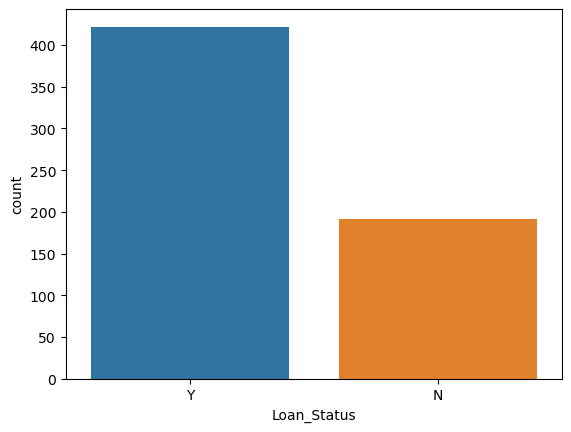

In [7]:
# Visualize the distribution of target variable
sns.countplot(x='Loan_Status', data=train_df)
plt.show()

# pre processing

In [8]:
#CHECK FOR MISSING VALUES
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
#HANDLE MISSING VALUES
train_df.dropna(inplace=True)
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
test_df.dropna(inplace=True)

In [14]:
#CHECK THE DATATYPES
train_df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [15]:
# Encoding categorical variables
le = LabelEncoder()
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.fit(test_df[col])

In [16]:
#One Hot Encoding
train_df=pd.get_dummies(train_df)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [17]:
# Separate features and target variable in train dataset
X_train = train_df.drop('Loan_Status', axis=1)
y_train = train_df['Loan_Status']
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [18]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on validation set
eval_predictions = rf_classifier.predict(X_eval)

# Evaluate model
print("Validation Accuracy:", accuracy_score(y_eval, eval_predictions))
print(classification_report(y_eval, eval_predictions))

Validation Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.78      0.98      0.86        82

    accuracy                           0.79       120
   macro avg       0.83      0.69      0.71       120
weighted avg       0.81      0.79      0.76       120



In [20]:
# Fine-tuning (GridSearchCV)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_classifier = grid_search.best_estimator_

# TESTING

In [ ]:
# Make predictions
X_test = test_df.drop(columns=['Loan_ID'])
test_predictions = best_rf_classifier.predict(X_test)

In [ ]:
# Load sample submission file
submission_df = pd.read_csv(r"C:\Users\fathi\OneDrive\Desktop\ICT\sample_submission_49d68Cx.csv")

In [ ]:
# Replace 'Loan_Status' column with predictions
test_df['Loan_Status'] = test_prediction

# Generate Submission File

In [ ]:
# Save predictions to a new submission file
test_df[['Loan_ID', 'Loan_Status']].to_csv('submission.csv', index=False)